# UnSupervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset.

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

Import the  Wholesale.csv dataset

In [73]:
#Libraries to work with dataframe
# import pandas
import pandas as pd
# Libraries to work with dataframe
import numpy as np
# Libraries for datetime
import datetime as dt
# Libraries for EDA
import matplotlib as plt
import seaborn as sns
# Libraries for ML
from sklearn import linear_model, datasets
import statsmodels.api as sm

In [77]:
 #load data
df = pd.read_csv(r'C:\Users\layin\OneDrive\Desktop\ml-project-unsupervised-learning\ml-project-unsupervised-learning\Wholesale_Data.csv', sep = ",")

In [78]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [79]:
df.drop(labels=(['Channel','Region']),axis=1,inplace=True)

In [58]:
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Fresh             440 non-null    int64
 1   Milk              440 non-null    int64
 2   Grocery           440 non-null    int64
 3   Frozen            440 non-null    int64
 4   Detergents_Paper  440 non-null    int64
 5   Delicassen        440 non-null    int64
dtypes: int64(6)
memory usage: 20.8 KB


Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This involves removing or imputing missing data or correcting any obvious errors.

In [81]:
# check missing values in variables

df.isnull().sum()

Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

There are no missing values in the dataset.

Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. 

In [85]:
df.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


Displot to show distribution of the different variables

In [86]:
#To check/list number variable type
num_variables = df.dtypes[df.dtypes != 'object'].index.tolist()


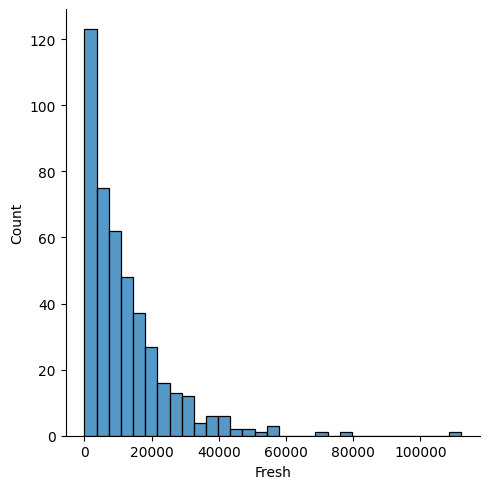

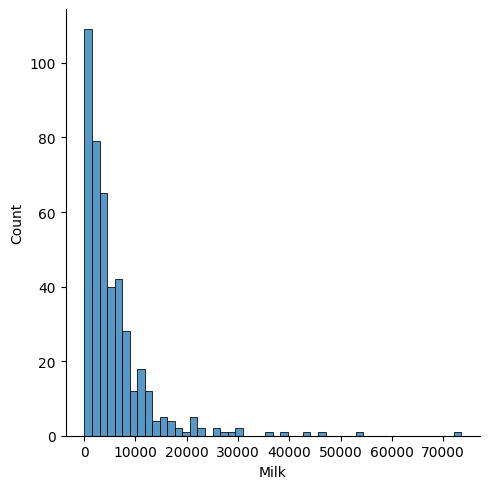

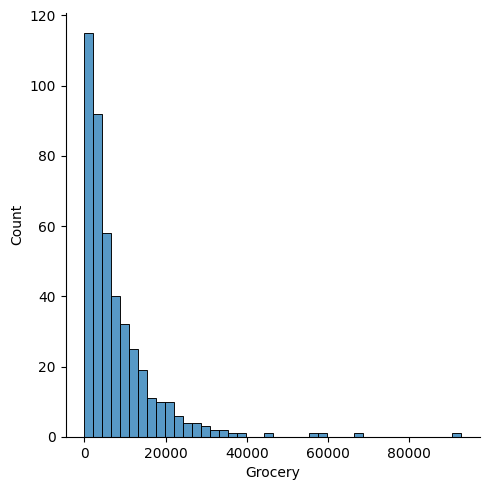

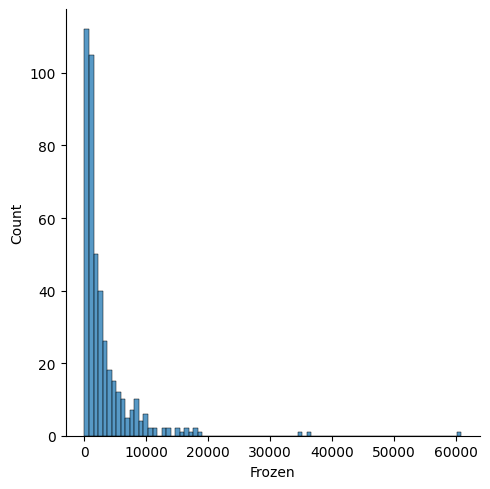

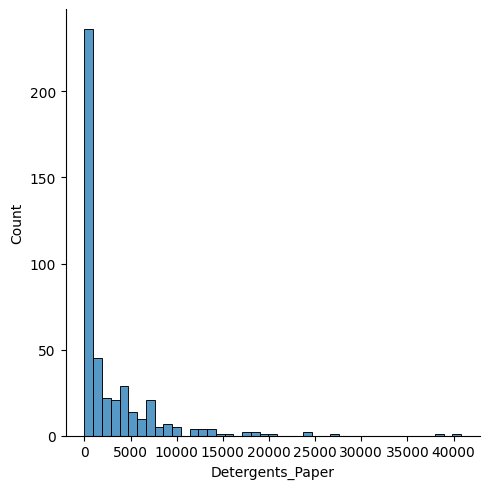

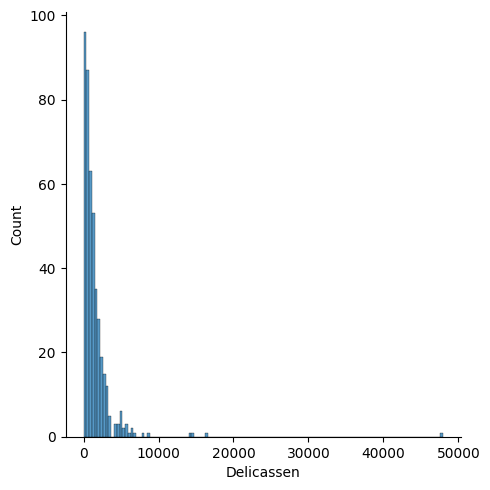

In [87]:
#displot to show distribution of the different variables
for column in num_variables:
    sns.displot(df[column])

It can be seen that this variables are not normal distributed . They are skewed to the right indicating outliers.

scattered plots to show correlation between Fresh and Milk

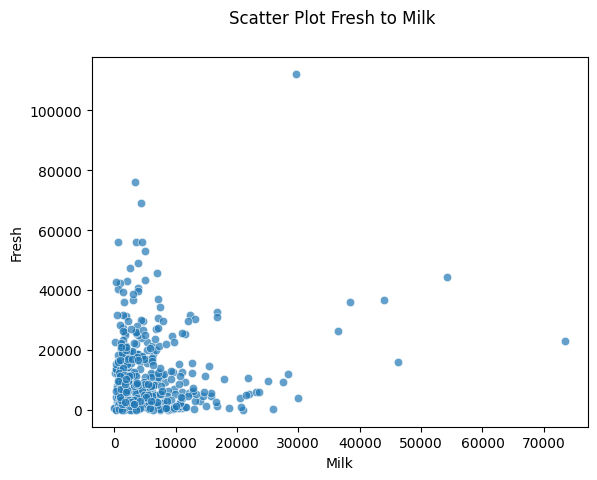

In [88]:
#scattered plots to show correlation between Fresh and Milk
import matplotlib.pyplot as plt
sns.scatterplot(data=df, 
                x="Milk", 
                y="Fresh",
                alpha = 0.7)
plt.suptitle("Scatter Plot Fresh to Milk")
plt.show()

Scatter plot showing relationship between Grocery and Milk that are frozen.

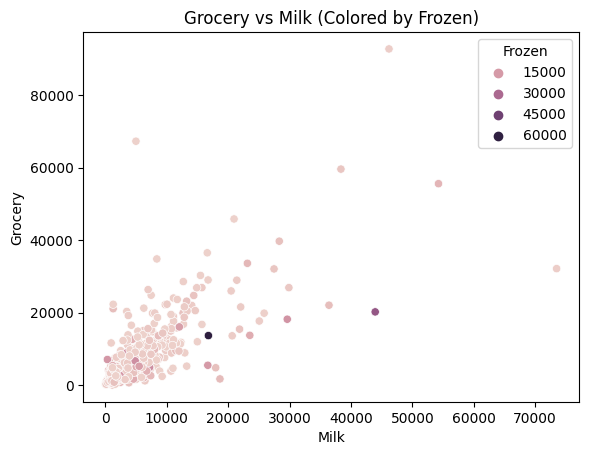

In [89]:
 # Scatter plot of "Grocery" vs. "Milk" colored by Frozen
sns.scatterplot(data=df, x='Milk', y='Grocery', hue='Frozen')
plt.xlabel('Milk')
plt.ylabel('Grocery')
plt.title('Grocery vs Milk (Colored by Frozen)')
plt.show()

jointplots showing the relationship between Delicassen and Grocery

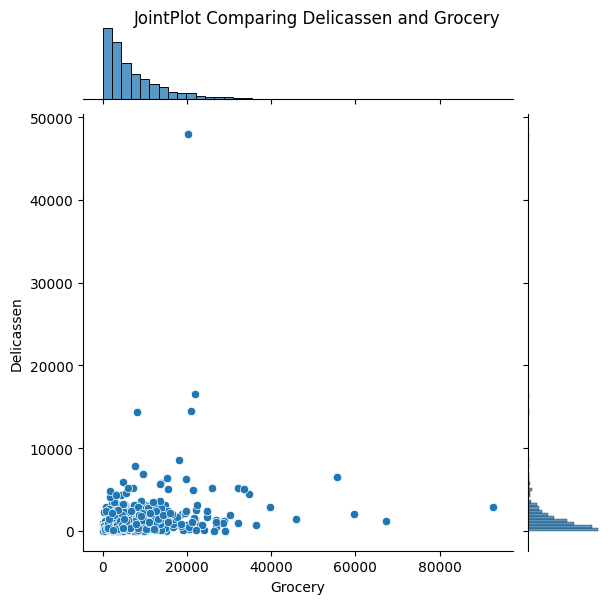

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.jointplot(data=df, 
              x="Grocery", 
              y="Delicassen",
              height=6    # a jointplot is a square by default 
             )
plt.suptitle("JointPlot Comparing Delicassen and Grocery", y=1)
plt.show()

Densityplot showing relationship between Detergent_paper annd Grocery

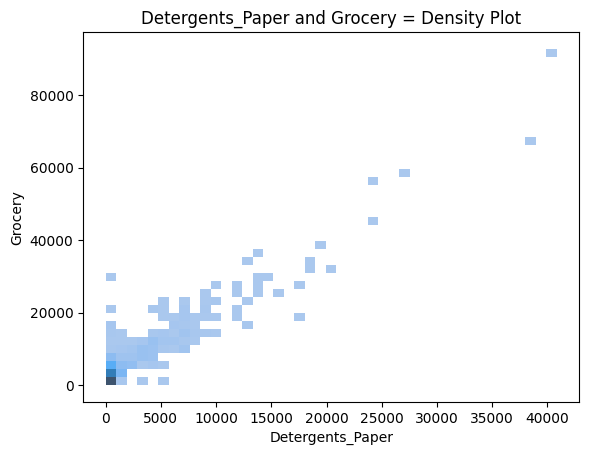

In [91]:
# Relationship between Grocery	and Detergents_Paper? 
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(data=df, 
             x="Detergents_Paper", 
             y="Grocery")

plt.title("Detergents_Paper and Grocery = Density Plot")

plt.show()

This densty plot show that there is correlation between Grocery and Detergents_paper.

In [92]:
# To Calculate the correlation matrix
corr = df.corr()
corr

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


Text(0.5, 1.0, 'Correlation Matrix Heatmap')

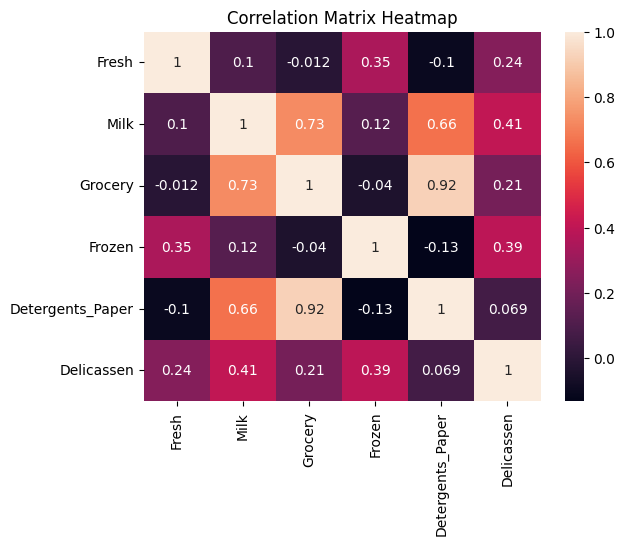

In [93]:
#Heatmap showing correlation in different variables.
# Create a heat map with correlation data
sns.heatmap(data= corr, annot=True)
plt.title("Correlation Matrix Heatmap")

 Based on the correlation coefficient, we can interpret thus that  there is almost no linear correlation between 'Fresh' and 'Grocery' spending which is  -0.012
There is a weak positive  correlation between Detergents_paper and Delicassen.0.069
There is a significant relationship  between Milk and Detergents_paper 0.66 meaning as the sales of milk increases, so is the sales of Detergents_paper.
There is a strong positive correlation between Grocery and Detergent_paper this indicates that as Grocery sales increases so is Detergents_paper.
-1 indicates a perfect negative correlation .
0 indicates no correlation .
1 indicates a perfect positive correlation

Pairplot showing distribution of variables and their correlation.

<Figure size 800x600 with 0 Axes>

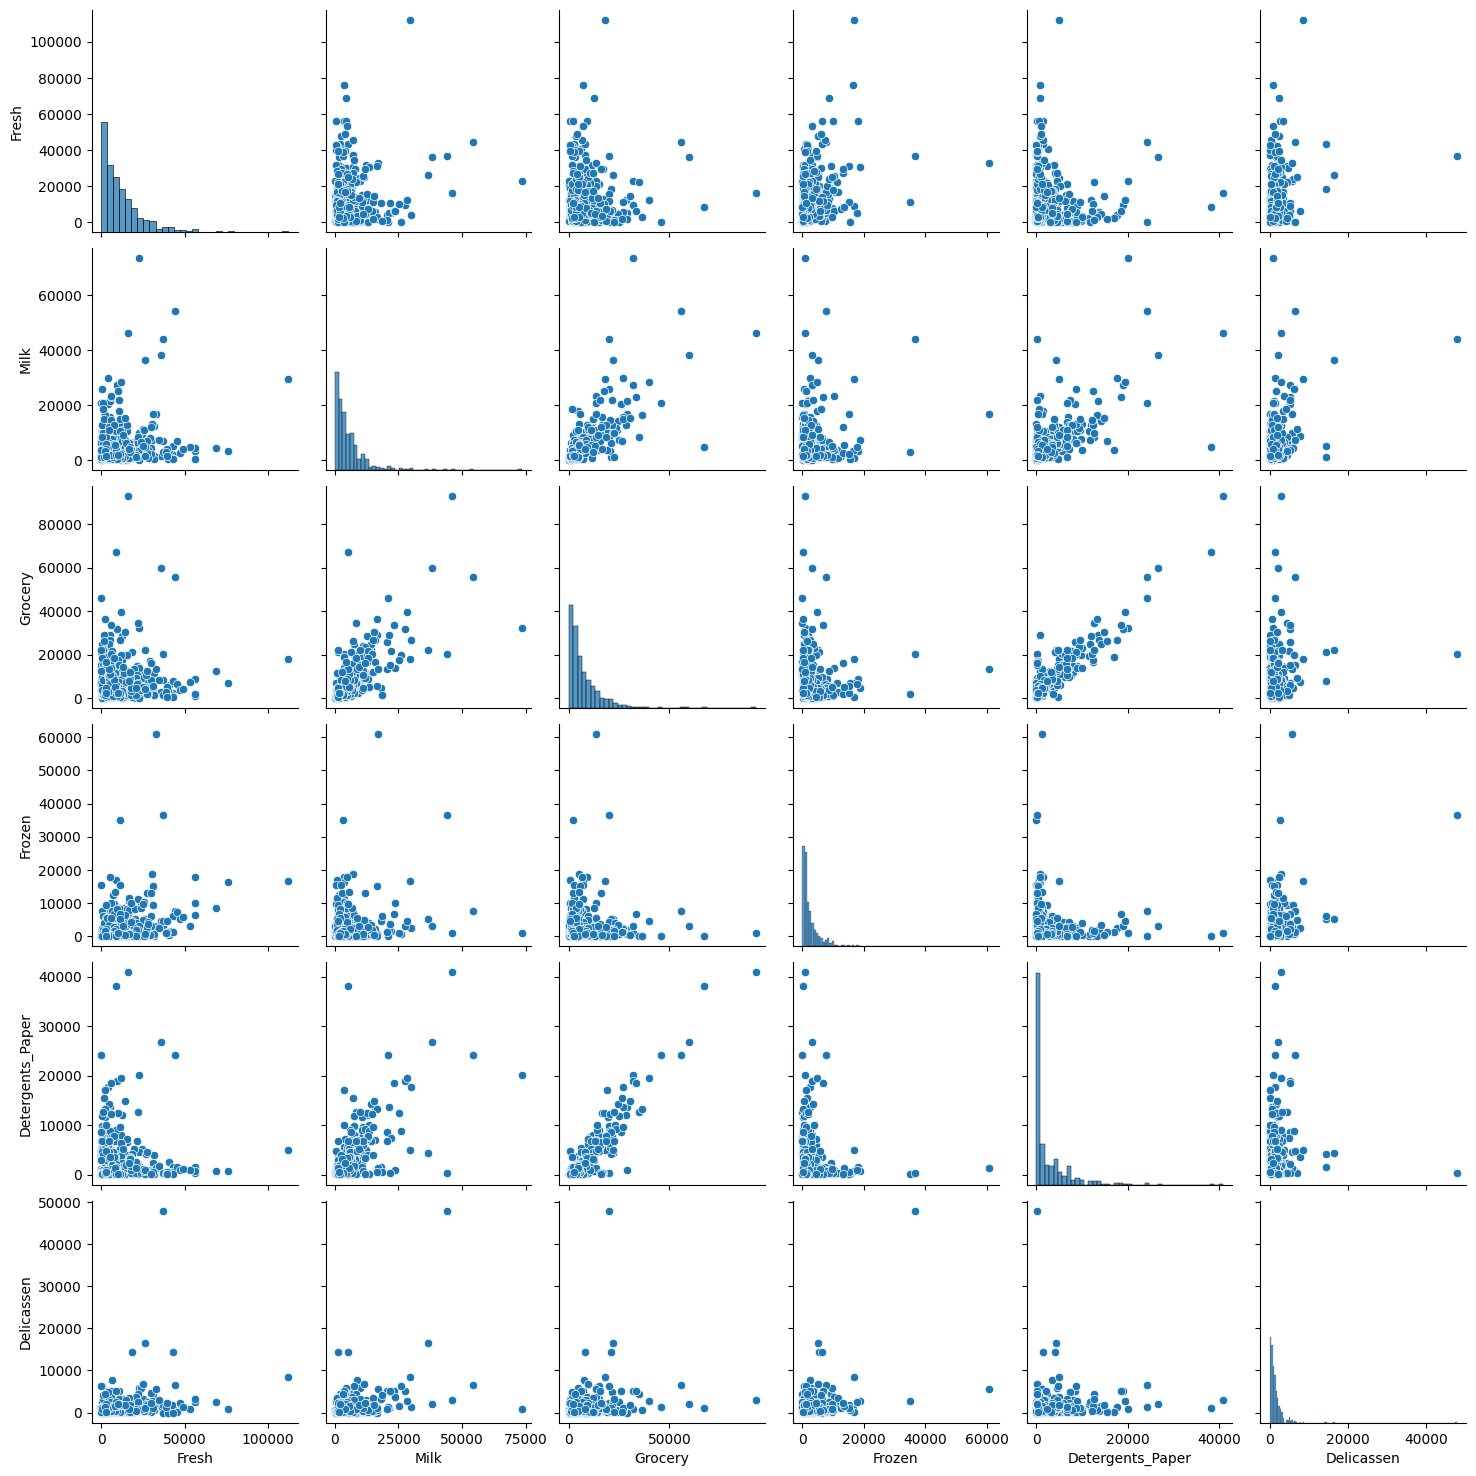

In [70]:
#Pairplot comparing many distributions at the same time.
plt.figure(figsize=(8, 6))
# Selecting numerical columns
numeric_col = df.select_dtypes(include='number')
# To create pair plots for numerical columns
sns.pairplot(numeric_col)
plt.show()

Boxplot showing the distribution of the variables and outliers

<Axes: >

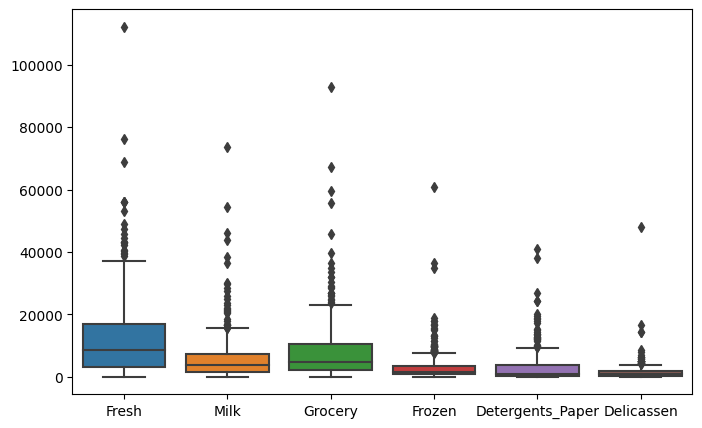

In [94]:
# boxplot showing variable distribution and Detecting outliers
plt.figure(figsize=(8, 5))
sns.boxplot(df)

All the 6 variables have outliers, since log transformation can be useful for reducing the impact of outliers and transforming a right-skewed distribution to a more symmetric or normal-like distribution, we will use log transformation on these variables.

In [95]:
 #using log transformation to handle skewed data or columns with outliers.
import numpy as np

# 'df' is my DataFrame and 'cols_with_outliers' is a list of column names with outliers
cols_with_outliers = ['Fresh','Milk', 'Grocery','Frozen', 'Detergents_Paper', 'Delicassen']

df_log_transformed = df[cols_with_outliers].apply(lambda x: np.log1p(x))
df_log_transformed

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,9.446992,9.175438,8.930891,5.370638,7.891705,7.199678
1,8.861917,9.191259,9.166284,7.474772,8.099858,7.482682
2,8.756840,9.083529,8.947026,7.785721,8.165364,8.967632
3,9.492960,7.087574,8.348064,8.764834,6.230481,7.489412
4,10.026413,8.596189,8.881697,8.272826,7.483244,8.553718
...,...,...,...,...,...,...
435,10.299037,9.396986,9.682092,9.483112,5.209486,7.698483
436,10.577172,7.266827,6.639876,8.414274,4.543295,7.760893
437,9.584108,9.647885,10.317053,6.082219,9.605216,7.532624
438,9.239025,7.591862,7.711101,6.946014,5.129899,7.661998


In [96]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler


# Standardization using StandardScaler
scaler_standard = StandardScaler()
df_log_standardized = pd.DataFrame(scaler_standard.fit_transform(df_log_transformed), columns=df.columns)

# Normalization using MinMaxScaler
scaler_minmax = MinMaxScaler()
df_log_normalized = pd.DataFrame(scaler_minmax.fit_transform(df_log_transformed), columns=df.columns)

# Display the original, log-transformed, log-standardized, and log-normalized DataFrames
print("Original Data:")
print(df)

print("\nLog-Transformed Data:")
print(df_log_transformed)

print("\nLog-Standardized Data:")
print(df_log_standardized)

print("\nLog-Normalized Data:")
print(df_log_normalized)

Original Data:
     Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0    12669   9656     7561     214              2674        1338
1     7057   9810     9568    1762              3293        1776
2     6353   8808     7684    2405              3516        7844
3    13265   1196     4221    6404               507        1788
4    22615   5410     7198    3915              1777        5185
..     ...    ...      ...     ...               ...         ...
435  29703  12051    16027   13135               182        2204
436  39228   1431      764    4510                93        2346
437  14531  15488    30243     437             14841        1867
438  10290   1981     2232    1038               168        2125
439   2787   1698     2510      65               477          52

[440 rows x 6 columns]

Log-Transformed Data:
         Fresh      Milk    Grocery    Frozen  Detergents_Paper  Delicassen
0     9.446992  9.175438   8.930891  5.370638          7.891705    7.199678
1     


- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

# Part II - KMeans Clustering

 To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

In [97]:
 #Create DataFrame from df_log_normalized.
df1 = df_log_normalized

In [98]:
#Select features for clustering
X = df1[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']]


In [99]:

X

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.787076,0.717315,0.750579,0.272291,0.704748,0.619005
1,0.729947,0.719518,0.773997,0.543498,0.727298,0.649139
2,0.719687,0.704513,0.752184,0.583577,0.734394,0.807256
3,0.791565,0.426513,0.692596,0.709778,0.524784,0.649856
4,0.843653,0.636636,0.745685,0.646361,0.660499,0.763182
...,...,...,...,...,...,...
435,0.870273,0.748172,0.825313,0.802358,0.414176,0.672118
436,0.897431,0.451479,0.522656,0.664593,0.342006,0.678763
437,0.800465,0.783118,0.888482,0.364008,0.890377,0.654457
438,0.766770,0.496751,0.629227,0.475345,0.405555,0.668233


In [102]:
from sklearn.cluster import KMeans
#Choose the number of clusters (K)
n_clusters = 3
#Create KMeans object or instance
kmeans = KMeans(n_clusters=n_clusters) #or km = KMeans(n_clusters = 3)
# Fit the KMeans model
kmeans.fit(X)

c:\Users\layin\anaconda3\envs\test_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [103]:
 #Add cluster labels to the DataFrame
df1['Cluster'] = kmeans.labels_


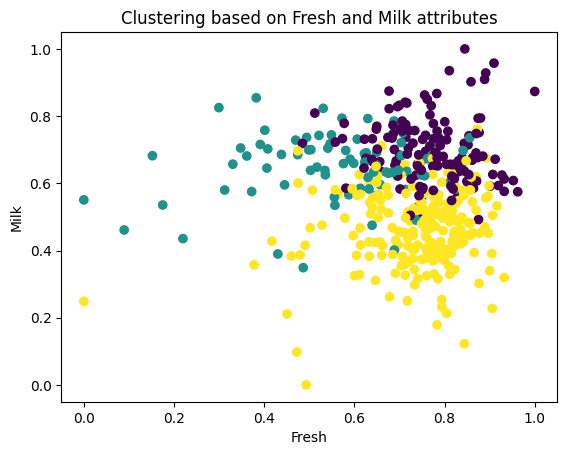

In [105]:
#visualize the clusters (using the first two features for simplicity)
plt.scatter(X['Fresh'], X['Milk'], c=df1['Cluster'], cmap='viridis')
plt.xlabel('Fresh')
plt.ylabel('Milk')
plt.title('Clustering based on Fresh and Milk attributes')
plt.show()


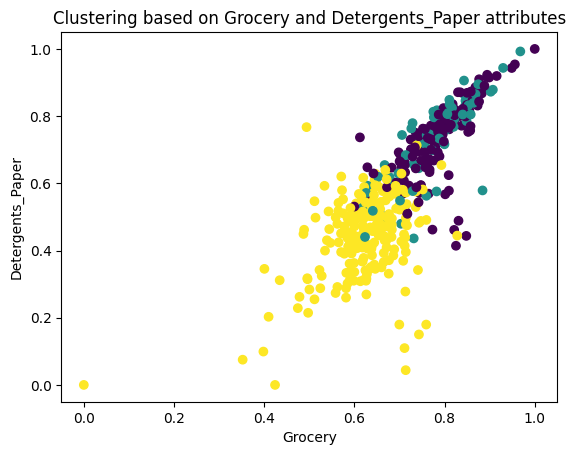

In [147]:
#visualize the clusters (using another two features for simplicity Grocery and Detergents_Paper)
plt.scatter(X['Grocery'], X['Detergents_Paper'], c=df1['Cluster'], cmap='viridis')
plt.xlabel('Grocery')
plt.ylabel('Detergents_Paper')
plt.title('Clustering based on Grocery and Detergents_Paper attributes')
plt.show()

Visualizing a 3D plot of features  with  positive significant correlation (Grocery, Detergents_Paper, and Milk)

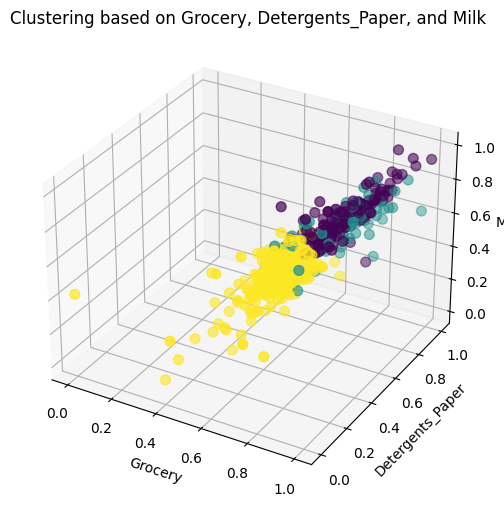

In [163]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Visualize the Clusters (3D Scatter Plot)
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X['Grocery'], X['Detergents_Paper'], X['Milk'], c=df1['Cluster'], cmap='viridis', s=50)
ax.set_xlabel('Grocery')
ax.set_ylabel('Detergents_Paper')
ax.set_zlabel('Milk')
ax.set_title('Clustering based on Grocery, Detergents_Paper, and Milk')

plt.show()

In [106]:
y_pred =kmeans.predict(X)
y_pred

array([1, 0, 0, 2, 0, 0, 1, 0, 1, 0, 0, 2, 0, 0, 0, 2, 1, 2, 0, 1, 0, 2,
       0, 0, 0, 1, 2, 2, 0, 2, 0, 2, 2, 2, 2, 1, 0, 0, 1, 2, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 2, 1, 0, 1, 2, 0, 0, 1, 2, 1, 1, 0, 0, 0, 2, 1,
       1, 0, 0, 2, 2, 0, 2, 0, 0, 2, 2, 0, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0,
       2, 0, 2, 2, 0, 2, 1, 1, 1, 2, 2, 2, 0, 0, 0, 0, 2, 2, 1, 0, 1, 1,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 1, 2, 2, 2,
       2, 2, 2, 2, 0, 1, 2, 2, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 0, 1, 1, 2, 2, 0, 0, 0, 0, 1, 2, 2, 1, 1, 1, 1, 2, 1,
       0, 2, 2, 2, 0, 0, 1, 0, 1, 2, 2, 1, 0, 1, 2, 2, 2, 1, 2, 2, 0, 0,
       2, 2, 0, 0, 0, 1, 2, 1, 2, 1, 0, 0, 2, 0, 2, 0, 1, 0, 1, 2, 1, 2,
       2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 1, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 1, 2, 2, 2,
       1, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 0, 0, 2, 0,

In [107]:
kmeans.labels_

array([1, 0, 0, 2, 0, 0, 1, 0, 1, 0, 0, 2, 0, 0, 0, 2, 1, 2, 0, 1, 0, 2,
       0, 0, 0, 1, 2, 2, 0, 2, 0, 2, 2, 2, 2, 1, 0, 0, 1, 2, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 2, 1, 0, 1, 2, 0, 0, 1, 2, 1, 1, 0, 0, 0, 2, 1,
       1, 0, 0, 2, 2, 0, 2, 0, 0, 2, 2, 0, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0,
       2, 0, 2, 2, 0, 2, 1, 1, 1, 2, 2, 2, 0, 0, 0, 0, 2, 2, 1, 0, 1, 1,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 1, 2, 2, 2,
       2, 2, 2, 2, 0, 1, 2, 2, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 0, 1, 1, 2, 2, 0, 0, 0, 0, 1, 2, 2, 1, 1, 1, 1, 2, 1,
       0, 2, 2, 2, 0, 0, 1, 0, 1, 2, 2, 1, 0, 1, 2, 2, 2, 1, 2, 2, 0, 0,
       2, 2, 0, 0, 0, 1, 2, 1, 2, 1, 0, 0, 2, 0, 2, 0, 1, 0, 1, 2, 1, 2,
       2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 1, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 1, 2, 2, 2,
       1, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 0, 0, 2, 0,

In [110]:
cluster_r = kmeans.labels_

In [108]:
print(kmeans.cluster_centers_) #centroids

[[0.77036483 0.69605246 0.78391995 0.58154933 0.7236855  0.65145723]
 [0.56514958 0.64208919 0.7779849  0.3217586  0.7369906  0.47647015]
 [0.74094084 0.46617813 0.62294735 0.55813706 0.44380873 0.53971702]]


In [132]:
kmeans.cluster_centers_ #centroids

array([[0.77036483, 0.69605246, 0.78391995, 0.58154933, 0.7236855 ,
        0.65145723],
       [0.56514958, 0.64208919, 0.7779849 , 0.3217586 , 0.7369906 ,
        0.47647015],
       [0.74094084, 0.46617813, 0.62294735, 0.55813706, 0.44380873,
        0.53971702]])

The above result shows the final Cluster Centers:Converged after 6 iterations.

In [135]:
centroid= kmeans.cluster_centers_

let's plot the predicted clusters along with their centroids

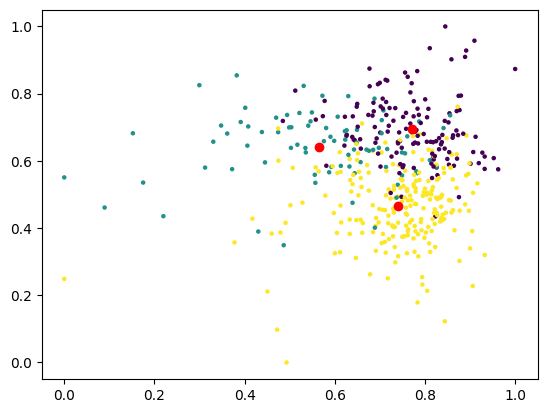

In [137]:
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=y_pred, s=5) #have color (c) represent the predictions (y_pred)
plt.scatter(centroid[:, 0], centroid[:, 1], c='red') #print the centroids model.cluster_centers_

from here, I will do PCA  .Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) .

Let's visualize the Elbow plot

In [112]:

import warnings 
warnings.filterwarnings('ignore')

inertia = [] #Within cluster sum squares
for i in range(2,15):
    km = KMeans(n_clusters= i)
    km.fit(X)
    inertia.append(km.inertia_)

In [113]:
inertia

[40.972562930206124,
 34.771262085064436,
 30.670931375023912,
 27.857068149829935,
 25.838658670476125,
 24.163161246315347,
 22.78477976335259,
 21.615685079985795,
 20.436255003030695,
 19.91244392613985,
 19.00480091508151,
 18.16048848553944,
 17.657908685064623]

In [114]:
km = KMeans(n_clusters = len(X))
km.fit(X)
km.inertia_

0.0

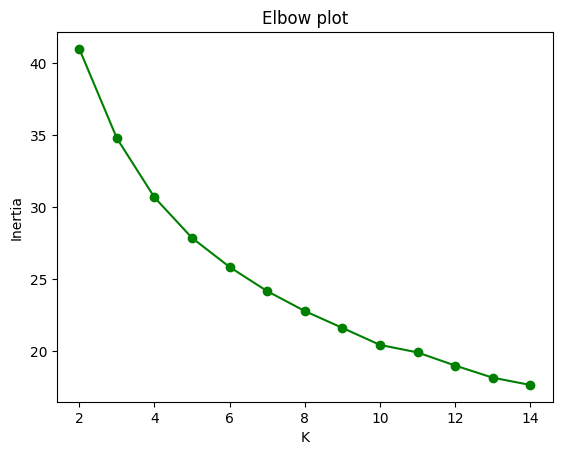

In [119]:
plt.plot(range(2,15), inertia, 'og-')
plt.title('Elbow plot')
plt.xlabel("K")
plt.ylabel("Inertia");

As you can see, the inertia drops very quickly as we increase k up to 4, but then it decreases much more slowly as we keep increasing k.

Let's do clustering with k=4

# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

The 'ward' linkage method in hierachical clustering was used, this minimizes the variance of distances between clusters. Then, we create a dendrogram to visualize the hierarchical structure of the data.

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

Dendogram

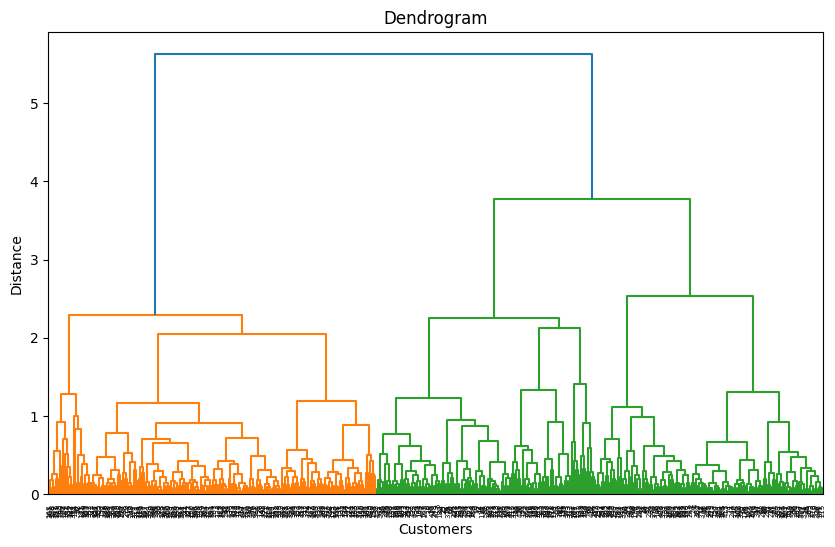

Cluster Assignments:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [160]:
# Perform hierarchical clustering
linkage_matrix = linkage(X, method='ward')

# Create a dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix)
plt.xlabel('Customers')
plt.ylabel('Distance')
plt.title('Dendrogram')
plt.show()

# Determine the threshold distance based on the dendrogram plot
threshold_distance = 10

# Using the threshold distance to get cluster assignments.
clusters = fcluster(linkage_matrix, t=threshold_distance, criterion='distance')

# Print the cluster assignments
print("Cluster Assignments:")
print(clusters)



Analyzing the dendrogram plot showing the relationship  of different feature, we can determine the optimum number of clusters based on the vertical lines (threshold_distance) where it forms distinct clusters. The threshold_distance is selected based on the height of the dendrogram where it is clear to separate the clusters and this is  around 4

The fcluster function was used to get the cluster assignments based on the threshold_distance. The clusters variable contains the cluster assignments for each data point in the dataset.

# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

PCA reduces the dimensionality of the data set
analyzing the explained variance helps to determine the number of principal components to retain.

In [141]:
def optimal_number_of_clusters(data, max_clusters):
    linkage_matrix = linkage(data, method='ward')
    last_merges = linkage_matrix[-max_clusters+1:, 2]
    diff = np.diff(last_merges, n=2)
    optimal_clusters = np.argmax(diff) + 2
    return optimal_clusters

In [143]:
from sklearn.decomposition import PCA

pca = PCA(n_components=None) # the number of principal component to retain is none for now.

dfx_pca = pca.fit(X)


In [144]:
y=dfx_pca.explained_variance_ratio_,# this attribute shows the percentage of variance explained by each principal component.

In [145]:
print (y)

(array([0.44801067, 0.27297911, 0.10654466, 0.09551079, 0.05652849,
       0.02042629]),)


The first 3 principal components (0.44801067, 0.27297911, 0.10654466) captured most of the variance in the data gaving approximately 90% of the model prediction which accounts for the larger part of the model that can be retained.

In [165]:
 #Transform the data into the reduced feature space using the selected number of principal components
# For example, let's say we want to retain the first 3 principal components
selected_n_components = 3
pca_selected = PCA(n_components=selected_n_components)
pca_result_selected = pca_selected.fit_transform(X)

# Print the transformed data
print("Data Transformed into the Reduced Feature Space (First 3 Principal Components):")
print(pca_result_selected)


Data Transformed into the Reduced Feature Space (First 3 Principal Components):
[[-0.22873206  0.07738094 -0.21603028]
 [-0.21227649 -0.0976801  -0.00164962]
 [-0.21782851 -0.18881549 -0.02568626]
 ...
 [-0.43350603 -0.03255549 -0.14134115]
 [ 0.17494727 -0.02055628 -0.12913405]
 [ 0.07345481  0.4744991  -0.13446566]]


To visualize the first 3 most important principal components from the original 6 features, you can use a 3D scatter plot

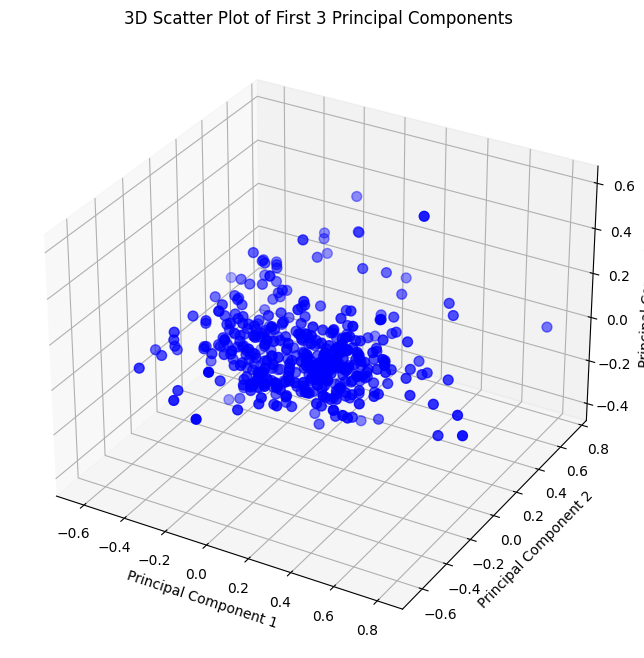

In [167]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Create a DataFrame with the first 3 principal components
df_pca = pd.DataFrame(data=pca_result_selected, columns=['PC1', 'PC2', 'PC3'])

# Plot the 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], c='blue', s=50)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D Scatter Plot of First 3 Principal Components')
plt.show()


we can load vector object to show the contribution of each original feature to the first 3 principal components

# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

- The first 3 principal components captured most of the variance in the data giving approximately 90% of the model prediction which accounts for the larger part of the model that can be retained and this is likely to be Grocery and Detergent_paper and milk . These are the most important feature when considering wholesale distribution by stakeholders.

- There is a strong positive correlation between Grocery and Detergent_paper this indicates that as Grocery sales increases so is Detergents_paper therefore wholesale distributors should take note of these features during distribution for more sales since they go hand in hand.

-The dendrogram plot shows that the optimum number of cluster is around 4.

The inertia  in the elbow plot drops very quickly as we increase k up to 4, but then it decreases much more slowly as we keep increasing k.The optimum number of cluster is likely to be here also 4.